<a href="https://colab.research.google.com/github/DuongDuyThoai/bai-tap-AI/blob/main/gao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Colab Notebooks/gao

/content/gdrive/MyDrive/Colab Notebooks/gao


In [4]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/gao/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1000 images belonging to 5 classes.


In [6]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/gao/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 250 images belonging to 5 classes.


In [7]:
training_set.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [8]:
test_set.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [10]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/50
32/32 [==============================] - 165s 5s/step - loss: 0.1035 - accuracy: 0.9700 - val_loss: 0.1422 - val_accuracy: 0.9560
Epoch 2/50
32/32 [==============================] - 163s 5s/step - loss: 0.0816 - accuracy: 0.9710 - val_loss: 0.0484 - val_accuracy: 0.9880
Epoch 3/50
32/32 [==============================] - 163s 5s/step - loss: 0.0545 - accuracy: 0.9840 - val_loss: 0.0771 - val_accuracy: 0.9800
Epoch 4/50
32/32 [==============================] - 163s 5s/step - loss: 0.0637 - accuracy: 0.9750 - val_loss: 0.0683 - val_accuracy: 0.9720
Epoch 5/50
32/32 [==============================] - 162s 5s/step - loss: 0.0479 - accuracy: 0.9820 - val_loss: 0.0285 - val_accuracy: 0.9920
Epoch 6/50
32/32 [==============================] - 163s 5s/step - loss: 0.0696 - accuracy: 0.9760 - val_loss: 0.0672 - val_accuracy: 0.9680
Epoch 7/50
32/32 [==============================] - 162s 5s/step - loss: 0.1026 - accuracy: 0.9670 - val_loss: 0.0273 - val_accuracy: 0.9920
Epoch 8/50
32

In [14]:
model.save('GAO.h5')

In [15]:
model_gao = load_model('GAO.h5')

In [16]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.028593312948942184
Train Accuracy 0.9879999756813049


1/1 [==============================] - 0s 139ms/step
Đây là loại gạo : Jasmine


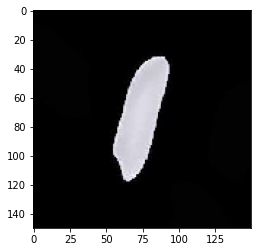

In [17]:
img = load_img('/content/1.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_gao.predict(img)
class_gao=['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là loại gạo :", class_gao[a])